In [1]:
%jsroot off

In [2]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<math.h>
#include<TF1.h>
#include<TLine.h>
#include<TStyle.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [3]:
// Selección de fit:
const Int_t fit = 2; // Opciones: 1: Gauss. 2: Breit Wigner.

In [4]:
void PrintCanvas(TCanvas* c1, string title) {
    string outFolder="Optimization";
    string tpng = outFolder+"/"+title+".png";
    c1->SaveAs(tpng.c_str());

    string tpdf = outFolder+"/"+title+".pdf";
    c1->SaveAs(tpdf.c_str());

    string troot = outFolder+"/"+title+".root";
    c1->SaveAs(troot.c_str());
    
    return;
}

Info in <TCanvas::Print>: png file Optimization/mass_four_lep.png has been created


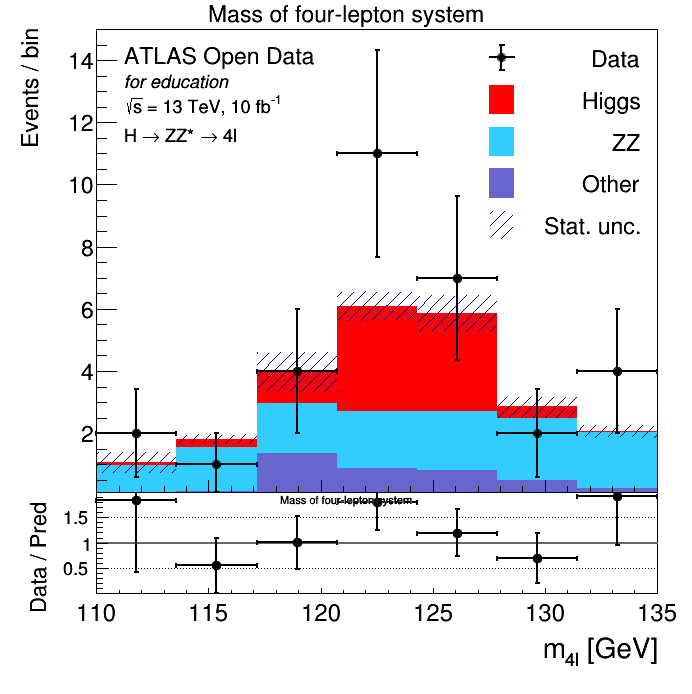

Info in <TCanvas::SaveAs>: ROOT file Optimization/mass_four_lep.root has been created


In [5]:
TFile *f = new TFile("//Plotting/histograms/mass_four_lep.root","READ");
//f->ls();
TH1F * h1 = (TH1F*)f->Get("c");

h1->SaveAs("Optimization/mass_four_lep.png");
h1->SaveAs("Optimization/mass_four_lep.root");

h1->Draw();

In [6]:
TCanvas *c1 = new TCanvas("c1","c1",900, 600); //este es comodin, por si queremos dibujar algo
/*TCanvas *cToys = new TCanvas("cToys","cToys",900, 600); //este lo usaremos para los modelos
cToys->Divide(2,1); //lo dividimos en una red the 3x1*/

In [7]:
gROOT->ForceStyle();

c1->cd();
//c1->SetGrid();

gStyle->SetPaperSize(20,26);
gStyle->SetPadTopMargin(0.05);
gStyle->SetPadRightMargin(0.05); 
gStyle->SetPadBottomMargin(0.16);
gStyle->SetPadLeftMargin(0.16);

gStyle->SetTitleXOffset(1.4);
gStyle->SetTitleYOffset(1.4);

gStyle->SetLabelSize(0.04,"XYZ");
gStyle->SetTitleSize(0.04,"XYZ");

gStyle->SetTextFont(42);

//Legendas
gStyle->SetOptTitle (0/1);
gStyle->SetOptStat(0);
gStyle->SetOptFit(1100);

gStyle->SetLegendBorderSize(0);
gStyle->SetStatFontSize(0.02);
gStyle->SetStatW(0.15);
gStyle->SetStatBorderSize(0);
gStyle->SetStatX(.39); gStyle->SetStatY(.81); // Posición

gStyle->SetPalette(1); //opcional: cambia la paleta de colores en los plots.

In [8]:
Float_t minVal = 110.0; //Valor mínimo del intervalo.
Float_t maxVal = 135.0; //Valor máximo del intervalo.

In [9]:
Int_t n = 7;
Int_t nbins = 7;
TH1D *data = new TH1D("data","data",n,minVal,maxVal); // Histograma de datos.

// Con 7 bins:
if (n == 7) {  
    data->SetBinContent(1, 1);
    data->SetBinContent(2, 0);
    data->SetBinContent(3, 1);
    data->SetBinContent(4, 8);
    data->SetBinContent(5, 4);
    data->SetBinContent(6, 0);
    data->SetBinContent(7, 2);
}
data->SetName("data");
data->GetXaxis()->SetTitle("m_{4l} [GeV]");
c1->SetBottomMargin(0.12);
data->GetYaxis()->SetTitle("Events/5 GeV");
c1->SetLeftMargin(0.12);
data->SetAxisRange(0,11,"y");
data->SetLineColor(kBlack);
data->SetLineWidth(1);
data->SetMarkerStyle(21);
data->SetMarkerSize(1);
data->SetMarkerColor(kBlack);

In [10]:
if (fit == 1) {
    //PDF de la señal, más info: https://root.cern.ch/root/html524/TMath.html#TMath:Gaus
    TF1 *signalModel = new TF1("signalModel","[2]*TMath::Gaus(x,[0],[1],1)",minVal,maxVal);
    signalModel->SetParNames ("mean","sigma","constant"); //nombres de los parámetros
    signalModel->SetParameters(125.0,5.0,1.0); //valores de los parámetros
    //signalModel->FixParameter(0,123.8);
    signalModel->SetLineColor(kBlack);
    signalModel->SetLineWidth(2);
}
Float_t normSig;
if (fit == 2) {
    //PDF de la señal, más info: https://root.cern.ch/root/html524/TMath.html#TMath:BreitWigner
    TF1 *signalModel = new TF1("signalModel","[2]*TMath::BreitWigner(x,[0],[1])",minVal,maxVal);
    signalModel->SetParNames("mass","width","constant"); //nombres de los parámetros
    signalModel->SetParameters(125.0,5.0,1.0); //valores de los parámetros
    //signalModel->FixParameter(0,123.8);
    signalModel->SetLineColor(kBlack);
    signalModel->SetLineWidth(2);
}

In [11]:
r = data->Fit("signalModel",  "LQS", "", minVal, maxVal); // L: likelihood, Q: quiet, reduce printing, S: save fit result
r->Print("v");
//r->Print();
//cout << "Probabilidad de = " << TMath::Prob(signalModel->MinFcnValue()) << endl;


****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      3.75641
Chi2                      =      3.69141
NDf                       =            4
Edm                       =  1.49102e-06
NCalls                    =          161
mass                      =       123.63   +/-   0.707787    
width                     =      4.24837   +/-   2.24735     
constant                  =      65.4892   +/-   16.7743     

Covariance Matrix:

            	        mass       width    constant
mass        	     0.50096    -0.68541       2.485
width       	    -0.68541      5.0506     -1.3725
constant    	       2.485     -1.3725      281.38

Correlation Matrix:

            	        mass       width    constant
mass        	           1     -0.4309     0.20931
width       	     -0.4309           1   -0.036409
constant    	     0.20931   -0.036409           1


In [12]:
cout << "Probabilidad de X2= " << TMath::Prob(signalModel->GetChisquare(),signalModel->GetNDF()) << endl;

Probabilidad de X2= 0.449376


In [13]:
TGraphErrors *gr = new TGraphErrors(data);
Int_t nPoints = data->GetNbinsX();
for (Int_t i=0; i<nPoints; i++){
    gr->SetPoint(i, data->GetBinCenter(i+data->FindBin(110)), 0); 
}
(TVirtualFitter::GetFitter())->GetConfidenceIntervals(gr,0.68);
gr->SetName("gr");
gr->SetFillColor(3);
data->Draw("E");
gr->Draw("E3");
data->Draw("E1P SAME");

Info in <TCanvas::Print>: png file Optimization/fit.png has been created
Info in <TCanvas::Print>: pdf file Optimization/fit.pdf has been created


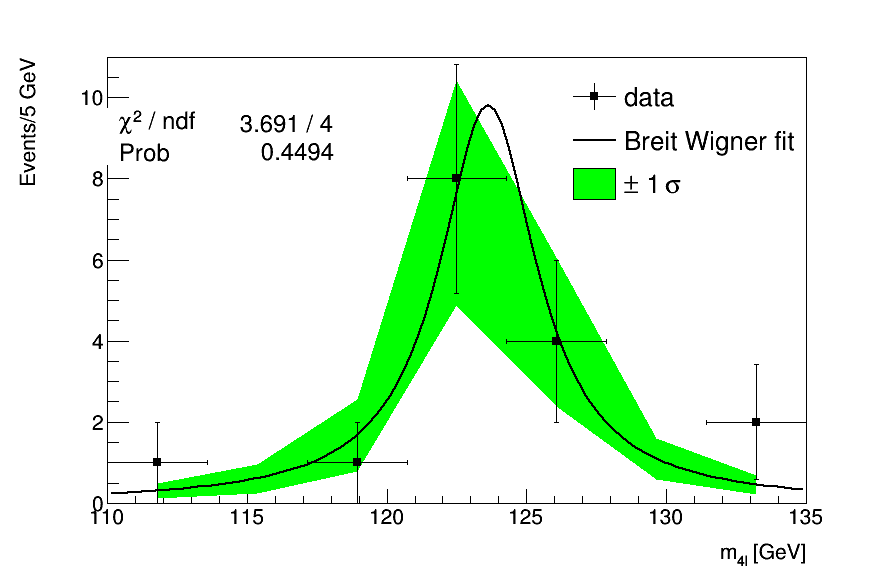

Info in <TCanvas::SaveAs>: ROOT file Optimization/fit.root has been created


In [14]:
//create legend
auto legend = new TLegend(.63,.64,.90,.87);
legend->AddEntry("data","data","lep");
if (fit == 1) legend->AddEntry(signalModel,"Gaussian fit","L");
if (fit == 2) legend->AddEntry(signalModel,"Breit Wigner fit","L");
legend->AddEntry("gr","#pm 1 #sigma","f");
legend->Draw("SAME");
c1->Draw();
PrintCanvas(c1, "fit"); // Guardar fit en formato PNG, PDF y ROOT.

Primero creamos un histograma bidimensional

In [15]:
Float_t stepMass = 0.5;
Float_t stepWidth = 0.25;
binMass = int((maxVal-minVal)/stepMass);
binWidth = int(10./stepWidth);
L_Plot = new TH2D("L_Plot","L_Plot",binMass,minVal-stepMass/2.0,maxVal-stepMass/2.0,binWidth,0.5,10.5);

cout << "binMass: " << binMass << endl;
cout << "binWidth: " << binWidth << endl;

binMass: 50
binWidth: 40


Luego realizamos ajustes fijando tanto la masa como la anchura, de forma que nos permitan obtener el $\chi^{2}$ en función de dichos parámetros. Sin fijarlos, obtendríamos siempre el valor que más se ajuste a los datos (en el mínimo!).  

In [16]:
//this is for the likelihood con the mass and width
L_Plot->Clear();
for (Float_t masses = minVal; masses < maxVal; masses+=stepMass){
    //cout << "Filling: externo mass: "<< masses << ". bin:" << L_Plot->GetXaxis()->FindBin(masses) << endl;
    for (Float_t widths = 0.25; widths < 10.5; widths+=stepWidth){
        //cout << "Filling: interno mass and bin: " << widths << L_Plot->GetYaxis()->FindBin(widths) << endl;
        
        for (Int_t i=0; i<3; i++) signalModel->ReleaseParameter(i);
        signalModel->FixParameter(0,masses);
        signalModel->FixParameter(1,widths);
        r = data->Fit("signalModel","QLS");
        L_Plot->SetBinContent(L_Plot->FindBin(masses,widths),r->MinFcnValue());
    }
}

Info in <TCanvas::Print>: png file Optimization/2D_profile_likelihood.png has been created


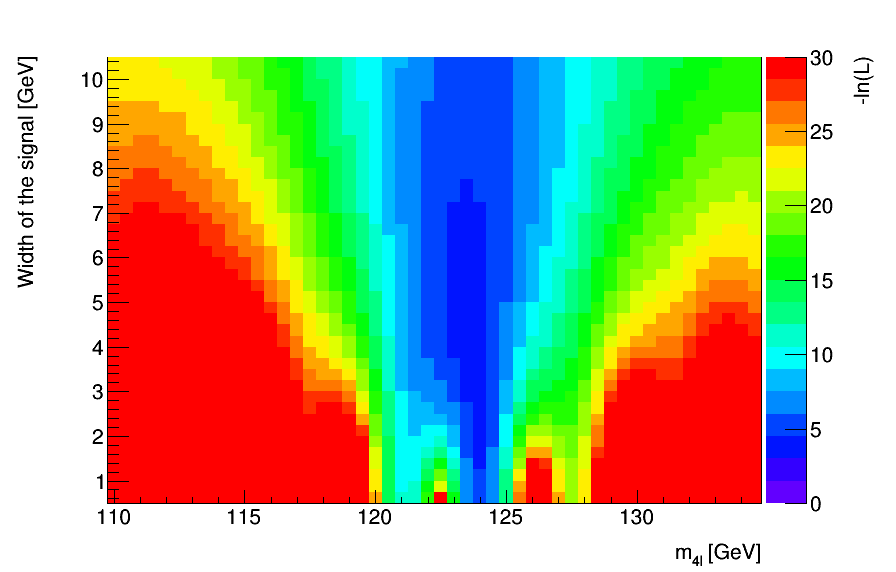

Info in <TCanvas::Print>: pdf file Optimization/2D_profile_likelihood.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file Optimization/2D_profile_likelihood.root has been created


In [17]:
//remove borders..
L_Plot->SetAxisRange(0.5,10.4,"y");
L_Plot->SetAxisRange(0,30,"z");
L_Plot->SetAxisRange(110,134.7,"x");
c1->SetRightMargin(0.15);
L_Plot->GetXaxis()->SetTitle("m_{4l} [GeV]");
L_Plot->GetYaxis()->SetTitle("Width of the signal [GeV]");
c1->SetRightMargin(0.15);
L_Plot->GetZaxis()->SetTitle("-ln(L)");
L_Plot->Draw("colz");
gStyle->SetOptStat(000000);
c1->Draw();
PrintCanvas(c1, "2D_profile_likelihood"); // Guardar 2D_hyperspace en formato PNG, PDF y ROOT.

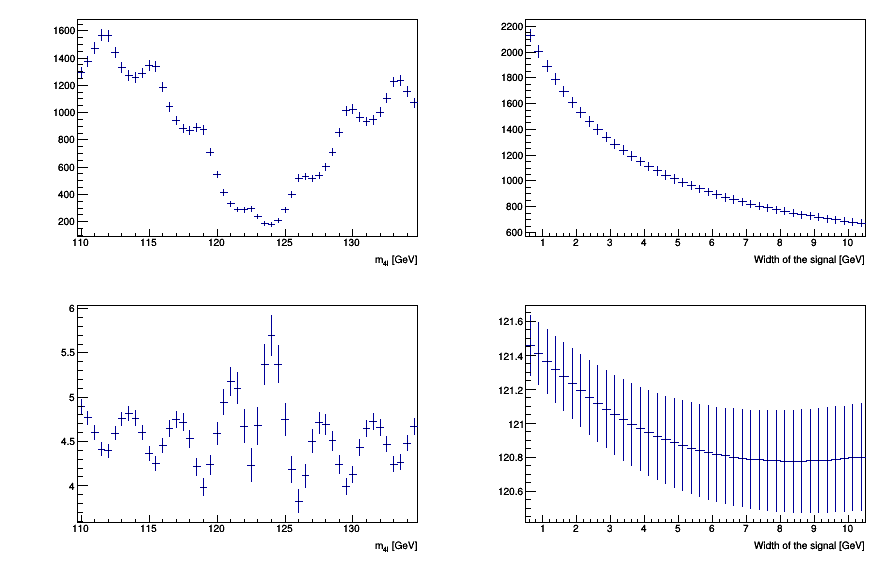

In [18]:
auto c2 = new TCanvas("Canvas2","Canvas2",900,600);
c2->Divide(2,2);
c2->cd(1); L_Plot->ProjectionX()->Draw("E");
c2->cd(2); L_Plot->ProjectionY()->Draw("E");
c2->cd(3); L_Plot->ProfileX()->Draw("E");
c2->cd(4); L_Plot->ProfileY()->Draw("E");
c2->Draw();

Cuando se realiza una proyección a lo largo de la dirección x(y), para cada ubicación a lo largo del eje x(y), se suman todos los contenidos de la ubicación a lo largo del eje y(x).
Cuando se realiza un perfil a lo largo de la dirección x(y), para cada contenedor a lo largo del eje x(y), el promedio de todos los contenidos del contenedor a lo largo de y(x) se calcula junto con su valor eficaz y se muestra como un símbolo con barra de error.
https://root.cern.ch/root/htmldoc/guides/primer/ROOTPrimer.html

Info in <TCanvas::Print>: png file Optimization/3D_profile_likelihood_1.png has been created


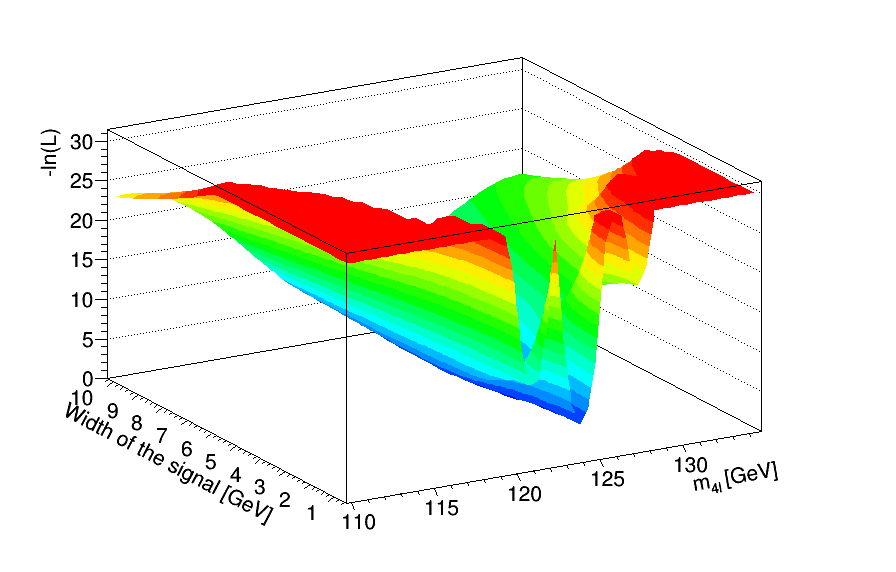

Info in <TCanvas::Print>: pdf file Optimization/3D_profile_likelihood_1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file Optimization/3D_profile_likelihood_1.root has been created


In [19]:
c1->cd();

// remove borders..
L_Plot->SetAxisRange(0.5,10,"y");

L_Plot->Draw("surf2");
c1->Draw();
PrintCanvas(c1, "3D_profile_likelihood_1"); // Guardar 3D_hyperspace en formato PNG, PDF y ROOT.

In [ ]:
// remove borders..
L_Plot->Draw("surf3");
c1->Draw();
PrintCanvas(c1, "3D_profile_likelihood_2"); // Guardar 3D_hyperspace en formato PNG, PDF y ROOT.

Info in <TCanvas::Print>: png file Optimization/3D_profile_likelihood_2.png has been created
